## 4월 데이터 및 각종 사회지표 추가된 데이터 EDA

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 한글 폰트 오류 해결
from matplotlib import font_manager, rc 
font_path = "C:\\Users\\이혜림\\Desktop\\Bita5/malgun.ttf" #폰트 파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)

In [46]:
data = pd.read_csv("./train.csv")
data = data.iloc[:,1:]

In [47]:
# 2020 2월, 3월, 4월 데이터 추출
sub_data = data.loc[((data["month"]==2)&(data["year"]==2020)) | ((data["month"]==3)&(data["year"]==2020))|((data["month"]==4)&(data["year"]==2020)),:]

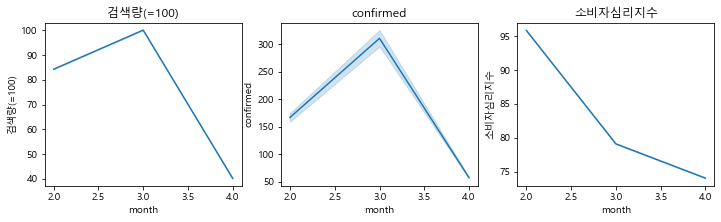

In [48]:
# 각 경제지표 추세 확인
plt.figure(figsize = (12,3))
for idx, y in enumerate(sub_data.columns[-3:]):
    plt.subplot(1,3,idx+1)
    sns.lineplot(x="month", y = y,data =sub_data)
    plt.title(y)

In [49]:
# 2,3,4월별 경제지표 데이터
economic_data = sub_data.groupby(["month"])[["검색량(=100)","confirmed","소비자심리지수"]].sum()/sub_data.groupby(["month"])[["검색량(=100)","confirmed","소비자심리지수"]].count()

In [50]:
economic_data

,검색량(=100),confirmed,소비자심리지수
month,,,
2,84.25142,166.912526,95.849880
3,100.00000,311.182177,79.091874
4,40.21097,56.966629,74.031100


### 12월에 코로나 종식될 것이라고 예측 -> 7월 예측치 정함

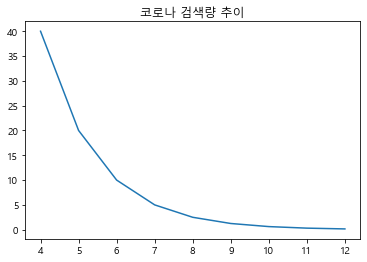

In [276]:
# 코로나 검색량 추이 생성
x = np.arange(4,13,1) 
y = []
r = 0.5 # 50% 씩 감소할 것으로 예측
for i in range(0,9):
    num = 40*(1-r)**i
    y.append(num)
    
sns.lineplot(x=x,y=y)
plt.title("코로나 검색량 추이")
plt.show()

# 4~!2월 검색량 예측치
corona_search = y.copy()

In [277]:
corona_search

[40.0, 20.0, 10.0, 5.0, 2.5, 1.25, 0.625, 0.3125, 0.15625]

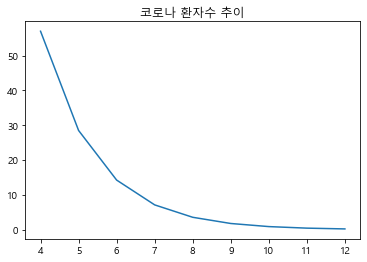

In [278]:
# 코로나 환자수 추이 생성
x = np.arange(4,13,1) 
y = []
r = 0.5

for i in range(0,9):
    num = 57*(1-r)**i
    y.append(num)
    
sns.lineplot(x=x,y=y)
plt.title("코로나 환자수 추이")
plt.show()

# 4~!2월 검색량 예측치
corona_patient = y.copy()

In [279]:
corona_patient

[57.0, 28.5, 14.25, 7.125, 3.5625, 1.78125, 0.890625, 0.4453125, 0.22265625]

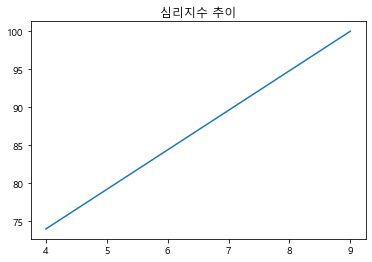

In [280]:
# 소비자 심리지수 추이 생성 
# 코로나가 장기화되면서 지친 소비자들 생김-> 9월쯤 소비자 심리지수가 회복될 것이라고 예측
x = np.arange(4,10,1) 
y = np.linspace(74,100,6)
r = 0.5 # 증가율|

sns.lineplot(x=x,y=y)
plt.title("심리지수 추이")
plt.show()

# 4~!2월 검색량 예측치
consumer_mind = y.copy()

In [281]:
consumer_mind

array([ 74. ,  79.2,  84.4,  89.6,  94.8, 100. ])

In [282]:
economic_data

,검색량(=100),confirmed,소비자심리지수
month,,,
2,84.25142,166.912526,95.849880
3,100.00000,311.182177,79.091874
4,40.21097,56.966629,74.031100


In [297]:
new = np.concatenate([corona_search[1:4], corona_patient[1:4], consumer_mind[1:4]]).reshape(3,3).T
new = pd.DataFrame(new, columns = economic_data.columns, index=[5,6,7])

total = pd.concat([economic_data,new])
total.columns = ["search","confirmed","consumer_mind"]
total.to_csv("./전체경제지표.csv",index=True)

In [260]:
predict_07 = pd.DataFrame([corona_search[3], corona_patient[3], consumer_mind[3]], columns = ["month_07"],index = ["corona_search","corona_patinet","consumer_mind"])
predict_07

predict_07.to_csv("./7월예측치.csv",index=True)

In [37]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# 확진자수는 동일할 것으로 예상
# 검색량은 추세를 따라갈 것
# 
model = LinearRegression()
model.fit(x=economic_data[0],y=[])

### 월 매출 추세 확인

In [21]:
# 각 월 매출 추세 확인
# 2020 2월, 3월, 4월 데이터 추출
sub_data_02 = data.loc[((data["month"]==2)&(data["year"]==2020)) | ((data["month"]==2)&(data["year"]==2019)),:]
effect02 = pd.DataFrame(effect02.groupby(["REG_YYMM","CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum())

sub_data_03 = data.loc[((data["month"]==3)&(data["year"]==2020)) | ((data["month"]==3)&(data["year"]==2019)),:]
effect03 = pd.DataFrame(effect02.groupby(["REG_YYMM","CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum())

sub_data_04 = data.loc[((data["month"]==4)&(data["year"]==2020)) | ((data["month"]==4)&(data["year"]==2019)),:]
effect04 = pd.DataFrame(effect02.groupby(["REG_YYMM","CARD_SIDO_NM","STD_CLSS_NM"])["AMT"].sum())

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,year,FLC,month,AMT,out_home,diff,검색량(=100),confirmed,소비자심리지수
205707,강원,건강보조식품 소매업,강원,1020s,2020,family,2,360000,1,-0.106782,84.25142,7.0,97
205708,강원,건강보조식품 소매업,강원,1020s,2020,single,2,441100,1,-0.106782,84.25142,7.0,97
205709,강원,건강보조식품 소매업,강원,3060s,2020,family,2,75486461,1,-0.106782,84.25142,7.0,97
205710,강원,골프장 운영업,강원,1020s,2020,family,2,362300,1,0.034461,84.25142,7.0,97
205711,강원,골프장 운영업,강원,1020s,2020,single,2,2922335,1,0.034461,84.25142,7.0,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265430,서울,정기 항공 운송업,충북,1020s,2020,single,4,3017380,0,-0.862732,40.21097,183.0,72
265431,서울,정기 항공 운송업,충북,3060s,2020,family,4,37190900,0,-0.862732,40.21097,183.0,72
265432,인천,정기 항공 운송업,충북,1020s,2020,single,4,54700,1,-0.862732,40.21097,29.0,72
265433,제주,정기 항공 운송업,충북,1020s,2020,single,4,480500,1,-0.862732,40.21097,4.0,72


In [25]:
before = data.loc[((data["month"]==2)&(data["year"]==2019)) | ((data["month"]==3)&(data["year"]==2019))|((data["month"]==4)&(data["year"]==2019)),:]
after = data.loc[((data["month"]==2)&(data["year"]==2020)) | ((data["month"]==3)&(data["year"]==2020))|((data["month"]==4)&(data["year"]==2020)),:]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


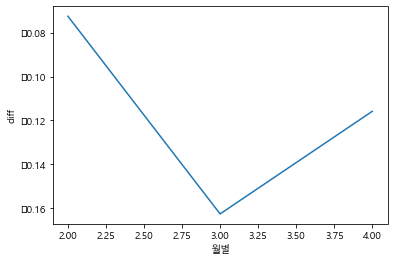

In [35]:
before_amt = before.groupby(["month"])["AMT"].sum()
after_amt = after.groupby(["month"])["AMT"].sum()

# 각 데이터를 하나의 데이터 프레임으로 합침
before_after_amt = pd.DataFrame(before_amt).merge(pd.DataFrame(after_amt), on=before_amt.index)
before_after_amt.columns = ["월별","before_amt", "after_amt"]

# 증감율 칼럼 추가
before_after_amt["diff"]=(before_after_amt["after_amt"]-before_after_amt["before_amt"])/before_after_amt["before_amt"]
sns.lineplot(x="월별", y="diff", data=before_after_amt)


In [33]:
before["month"]=before["month"].astype(str)
after["month"]=after["month"].astype(str)

0        2
1        2
2        2
3        2
4        2
        ..
50674    4
50675    4
50676    4
50677    4
50678    4
Name: month, Length: 50679, dtype: object